# Analyze discrete EMG data boundary

In [14]:
import umap
import numpy as np
import matplotlib.pyplot as plt

from configs import BaseConfig
from lift.datasets import (
    load_all_mad_datasets, 
    compute_features, 
)

In [10]:
config = BaseConfig()

mad_windows, mad_labels = load_all_mad_datasets(
    config.mad_base_path.as_posix(),
    num_channels=config.n_channels,
    emg_range=config.emg_range,
    window_size=config.window_size,
    window_overlap=config.window_overlap,
    desired_labels=config.desired_mad_labels,
    skip_person='Female0',
    return_tensors=True,
)
mad_features = compute_features(mad_windows)

def normalize(x, mu, std):
    return (x - mu) / std

features_norm = normalize(
    mad_features, 
    mad_features.mean(0), 
    mad_features.std(0),
)

print("data size", mad_features.shape, mad_labels.shape)

skipping Female0
skipping Female0
skipping Female0
skipping Female0
MAD dataset loaded
data size torch.Size([13075, 32]) torch.Size([13075])


In [11]:
reducer = umap.UMAP(
    n_neighbors=50, 
    n_components=2, 
    metric="euclidean",
    n_jobs=1,
    random_state=0,
)
embeddings = reducer.fit_transform(features_norm)

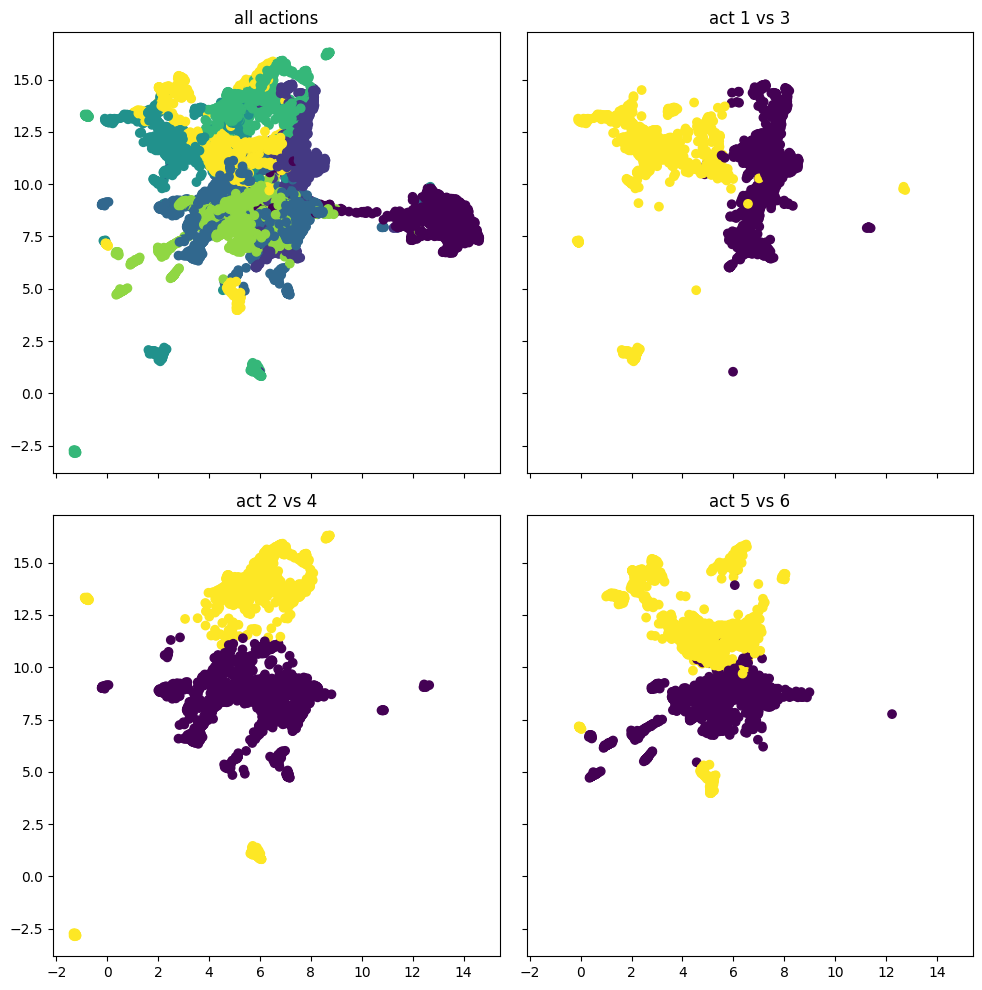

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = ax.flat
ax[0].scatter(
    embeddings[:, 0], embeddings[:, 1], c=mad_labels,
)
ax[0].set_title("all actions")

cur_labels = np.stack([mad_labels == 1, mad_labels == 3]).any(0)
ax[1].scatter(
    embeddings[cur_labels, 0], embeddings[cur_labels, 1], c=mad_labels[cur_labels]
)
ax[1].set_title("act 1 vs 3")

cur_labels = np.stack([mad_labels == 2, mad_labels == 4]).any(0)
ax[2].scatter(
    embeddings[cur_labels, 0], embeddings[cur_labels, 1], c=mad_labels[cur_labels]
)
ax[2].set_title("act 2 vs 4")

cur_labels = np.stack([mad_labels == 5, mad_labels == 6]).any(0)
ax[3].scatter(
    embeddings[cur_labels, 0], embeddings[cur_labels, 1], c=mad_labels[cur_labels]
)
ax[3].set_title("act 5 vs 6")

plt.tight_layout()
plt.show()